# What is data encoding?

It is the process of converting categorical variables into numerical representations that machine learning algorithms can process.

# Types of categorical features :

A. Binary: Either/or .
Examples: Yes, No ; True, False

B. Ordinal: Specific ordered Groups. 
Examples: low, medium, high ; cold, hot, lava Hot

C. Nominal: Unordered Groups. 
Examples : cat, dog, tiger ; pizza, burger, coke

# Data encoding tecniques :

1. Mapping binary features present in the dataset.
   
   df['bin_1'] = df['bin_1'].apply(lambda x: 1 if x == 'T' else (0 if x == 'F' else None))
   
2. Label Encoding: Label encoding algorithm is quite simple and it considers an order for encoding, Hence can be used for encoding ordinal data.

    from sklearn.preprocessing import LabelEncoder  
    le = LabelEncoder()
    df['ord_2'] = le.fit_transform(df['ord_2'])

   
3. One-Hot Encoding: To overcome the Disadvantage of Label Encoding as it considers some hierarchy in the columns which can be misleading to nominal features present in the data. we can use the One-Hot Encoding strategy. One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. 
One-hot encoding is processed in 2 steps:

    1. Splitting of categories into different columns.
    2. Put ‘0 for others and ‘1’ as an indicator for the appropriate column.
**One-Hot encoding with Sklearn library**
     
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc = enc.fit_transform(df[['nom_0']]).toarray()# transforming the column after fitting

encoded_colm = pd.DataFrame(enc)# converting arrays to a dataframe

df = pd.concat([df, encoded_colm], axis=1)# concatenating dataframes

df = df.drop(['nom_0'], axis=1)# removing the encoded column.
df.head(10)

**One-Hot encoding with pandas**

df = pd.get_dummies(df, prefix=['nom_0'], columns=['nom_0'])


4. Ordinal Encoding: We can use Ordinal Encoding provided in Scikit learn class to encode Ordinal features.
   
5. Manually assigning ranking by using a dictionary

  
temp_dict = {'Cold': 1, 'Warm': 2, 'Hot': 3}   # creating a dictionary

df['Ord_2_encod'] = df.ord_2.map(temp_dict)  # mapping values in column from dictionary

6. Mean/Target Encoding: Target encoding is good because it picks up values that can explain the target. It is used by most kagglers in their competitions. The basic idea is to replace a categorical value with the mean of the target variable.

from category_encoders import TargetEncoder

Targetenc = TargetEncoder()

values = Targetenc.fit_transform(X = df.nom_0, y = df.Target)

df = pd.concat([df, values], axis = 1)# concatenating values with dataframe

7. Frequency Encoding : It  assigns each category a value based on its frequency in the dataset. This technique can be useful for handling high-cardinality categorical features (features with many unique categories).

import pandas as pd

data = ['Red', 'Green', 'Blue', 'Red', 'Red']

series_data = pd.Series(data)

frequency_encoding = series_data.value_counts()

encoded_data = [frequency_encoding[x] for x in data]  # Encode the data by replacing categories with their frequency counts

print("Encoded Data:",encoded_data)

8. Dummy Encoding : This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

# Choosing the right encoding technique depends on the type of categorical data and the model's requirements:

    - Label Encoding is suitable for nominal data with no order.
    - One-Hot Encoding works best for nominal data where categories have no ranking.
    - Ordinal Encoding preserves the order of ordinal data.
    - Target Encoding is effective when there's a relationship between the categorical feature and the target variable.
    - Frequency Encoding is useful for handling high-cardinality features.
    - use countencoder, BaseNCoder especially for high-cardinality features.

# category_encoders library :

It is  set of scikit-learn-style transformers for encoding categorical variables into numeric by means of different techniques.

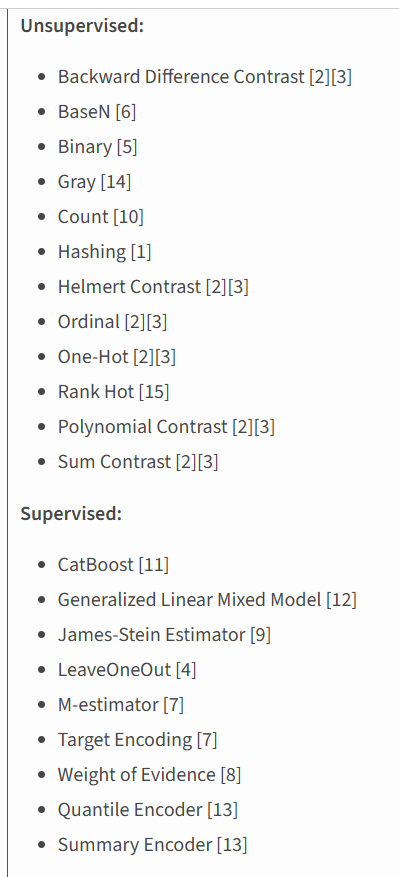